In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [60]:
#reading data from csv file that is in same directory as python process
col_list = ["Age (y)","Gender(1, male; 2, female)","BMI(kg/m2)","censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)",
            "drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"]
data1= pd.read_csv("RC Health Care Data-20180820.csv",usecols=col_list)
data1

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),"censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [61]:
# changing columns using .columns() 
data1.columns = ['Age', 'Gender', 'BMI', 'Outcome', 
                'smoking', 'drinking', 'family']
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [62]:
data1.isnull().any() 

Age         False
Gender      False
BMI         False
Outcome     False
smoking      True
drinking     True
family      False
dtype: bool

In [63]:
#Gives the count of all the null values present in each column
data1.isnull().sum()

Age              0
Gender           0
BMI              0
Outcome          0
smoking     151603
drinking    151603
family           0
dtype: int64

In [64]:
data1=data1.dropna()
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
3,59,1,23.1,0,3.0,3.0,0
9,31,1,22.4,0,3.0,3.0,0
16,25,2,20.3,0,3.0,3.0,0
19,66,1,24.9,0,1.0,3.0,0
...,...,...,...,...,...,...,...
211799,38,1,24.3,0,2.0,3.0,0
211806,57,1,25.1,0,1.0,3.0,0
211812,31,2,22.9,0,3.0,3.0,0
211826,68,2,28.4,0,3.0,3.0,0


In [65]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60230 entries, 0 to 211832
Data columns (total 7 columns):
Age         60230 non-null int64
Gender      60230 non-null int64
BMI         60230 non-null float64
Outcome     60230 non-null int64
smoking     60230 non-null float64
drinking    60230 non-null float64
family      60230 non-null int64
dtypes: float64(3), int64(4)
memory usage: 3.7 MB
None


In [66]:
data1
#groupby and size is used to return the class count of the target variable
class_count=data1.groupby('Outcome').size()
print(class_count)

Outcome
0    59058
1     1172
dtype: int64


In [80]:
count_class_0, count_class_1 = data1.Outcome.value_counts()
df_class_0 = data1[data1['Outcome'] == 0]
df_class_1 = data1[data1['Outcome'] == 1]

Random under-sampling:
1    1172
0    1172
Name: Outcome, dtype: int64


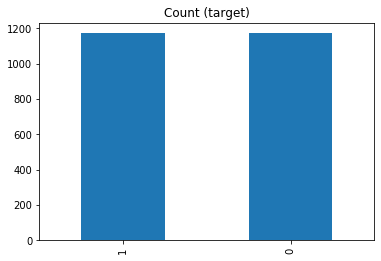

In [81]:
#performing random under sampling to overcome the biased nature of the model
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())
#plot that gives the count of each class
df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (target)');

In [82]:
#target variable after sampling
y_sample= df_test_under.Outcome
#features after sampling
X_sample=df_test_under.drop('Outcome', axis=1)
y_sample

71573     0
118336    0
102563    0
49377     0
36916     0
         ..
211159    1
211313    1
211395    1
211655    1
211832    1
Name: Outcome, Length: 2344, dtype: int64

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sample,y_sample,test_size=0.20,random_state=0) 

In [84]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0,1))
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[141  94]
 [ 22 212]]


0.7526652452025586

In [88]:
#classification report for precision, recall and f1-score for both class
print('Classification Report:')
print(classification_report(Y_test,y_pred, labels=[0,1]))
confusion = metrics.confusion_matrix(Y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       235
           1       0.69      0.91      0.79       234

    accuracy                           0.75       469
   macro avg       0.78      0.75      0.75       469
weighted avg       0.78      0.75      0.75       469

[[141  94]
 [ 22 212]]


In [89]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, y_pred))

0.7526652452025586
0.7526652452025586


In [90]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(Y_test, y_pred))

0.24733475479744135
0.24733475479744138


In [91]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(Y_test, y_pred))

0.905982905982906
0.905982905982906


In [92]:
specificity = TN / (TN + FP)

print(specificity)

0.6


In [93]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.4
0.4


In [94]:
recall = TP / float(TP + FN)
print(recall)

0.905982905982906


In [95]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(Y_test, y_pred))

0.6928104575163399
0.6928104575163399


In [96]:
fscore = 2*((precision * recall) / (precision + recall))
print(fscore)

0.7851851851851851


In [97]:
#validation of model using K-fold cross validation
kfold = KFold(n_splits=10)
results = cross_val_score(classifier,X_sample,y_sample, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 71.687% (9.098%)
